In [1]:
# mnist_softmax_deep_relu
# 4 layers

# MNIST(Modified National Institute of Standard Technology) Dataset
# https://ko.wikipedia.org/wiki/MNIST
# label : 0 ~ 9 , 손글씨체 이미지  28*28(784 byte) , gray scale
# Train : 60000개 , Test : 10000개

# batch : 큰 데이터를 쪼개어 1회에 작은 단위로 가져다가 학습, next_batch()
# epoch : batch를 반복하여 전체 데이터가 모두 소진되었을 때를 1 epoch
# Vanishing Gradient  : 신경망이 깊어 질수록 입력신호가 사라진다(줄어든다), sigmoid 사용시
# Relu  : Rectified Linear Unit, DNN(deep neural net) 구현시 sigmoid 대신 사용됨
# dropout : 전체 신경망의 일부를 사용하지 않고 학습, 예측시는 전체를 사용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)

In [2]:
# mnist 데이터 가져오기
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000, 28, 28)
<class 'numpy.ndarray'> (10000,)
5


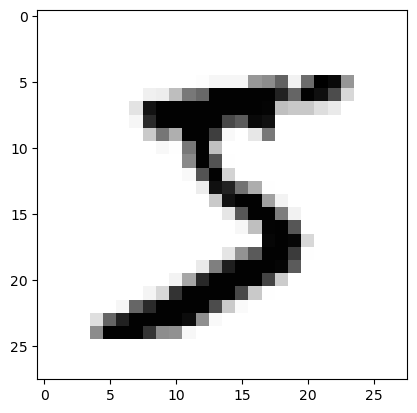

In [3]:
# 이미지로 출력
def show_one_image(n):
    print(type(x_train),x_train.shape) # (60000, 28, 28)
    print(type(y_train),y_train.shape) # (60000,)
    print(type(x_test),x_test.shape)   # (10000, 28, 28)
    print(type(y_test),y_test.shape)   # (10000,)
    
    image = x_train[n]
    print(y_train[n])
    
    plt.imshow(image,cmap='Greys')
    plt.show()

show_one_image(0)    

In [4]:
# one-hot 인코딩
nb_classes = 10  # 분류 class의 갯수(0~9)

Y_one_hot = tf.one_hot(y_train,nb_classes)   # (60000, 10)
print(Y_one_hot.shape)                       # (60000, 10) , (2차원)

# X값의 shape을 2차원으로 변환
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

# X값의 타입을 float형으로 변환
x_train = tf.cast(x_train,dtype=tf.float32)
print(x_train.shape,x_train.dtype)

x_test = tf.cast(x_test,dtype=tf.float32)
print(x_test.shape,x_test.dtype)

(60000, 10)
(60000, 784) <dtype: 'float32'>
(10000, 784) <dtype: 'float32'>


In [5]:
# Layer 1  : 은닉층(Hidden Layer)
# (60000, 784) * (784,512) = (60000, 512)
W1 = tf.Variable(tf.random.normal([784,512]), name='weight1')
b1 = tf.Variable(tf.random.normal([512]), name='bias1')

def layer1(X):
    # return  tf.sigmoid(tf.matmul(X,W1) + b1)  
    return  tf.nn.relu(tf.matmul(X,W1) + b1)  

In [6]:
# Layer 2  : 은닉층(Hidden Layer)
# (60000, 512) * (512,512) = (60000, 512)
W2 = tf.Variable(tf.random.normal([512,512]), name='weight2')
b2 = tf.Variable(tf.random.normal([512]), name='bias2')

def layer2(X):
    # return  tf.sigmoid(tf.matmul(layer1(X),W2) + b2) 
    return  tf.nn.relu(tf.matmul(layer1(X),W2) + b2) 

In [7]:
# Layer 3  : 은닉층(Hidden Layer)
# (60000, 512) * (512,512) = (60000, 512)
W3 = tf.Variable(tf.random.normal([512,512]), name='weight3')
b3 = tf.Variable(tf.random.normal([512]), name='bias3')

def layer3(X):
    # return  tf.sigmoid(tf.matmul(layer2(X),W3) + b3) 
    return  tf.nn.relu(tf.matmul(layer2(X),W3) + b3) 

In [8]:
# Layer 4  : 출력층(Output Layer)
# (60000, 512) * (512,10) = (60000, 10)
W4 = tf.Variable(tf.random.normal([512,nb_classes]), name='weight4')
b4 = tf.Variable(tf.random.normal([nb_classes]), name='bias4')

In [9]:
# 예측 함수(hypothesis) : H(X) = softmax(W*X + b)
def logits(X):
    return tf.matmul(layer3(X),W4) + b4

def hypothesis(X):
    return tf.nn.softmax(logits(X)) 

In [10]:
# 방법 2. batch 사이즈로 나누어 학습, 효율적 이며 학습 시간 단축
# 학습 시작

training_epoch = 25
batch_size = 600

# 경사 하강법
# learning_rate(학습율)을 0.01 로 설정하여 optimizer객체를 생성
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

Y_one_hot = tf.one_hot(y_train,nb_classes)   # (60000, 10)

print('***** Start Learning!!')
for epoch in range(training_epoch): # 15회
    
    avg_cost = 0
    
    # 100 = 60000/600
    total_batch = int(x_train.shape[0]/batch_size)
    for k in range(total_batch):  # 100회
        batch_xs = x_train[0 + k*batch_size:batch_size + k*batch_size]   # 600개의 X 데이터
        batch_ys = Y_one_hot[0 + k*batch_size:batch_size + k*batch_size] # 600개의 Y 데이터
        
        # 비용함수        
        def cost_func_batch():
            cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits(batch_xs),
                                             labels = batch_ys)
            cost =  tf.reduce_mean(cost_i)
            return cost
        
        # cost를 minimize 한다
        optimizer.minimize(cost_func_batch,var_list=[W1,b1,W2,b2,W3,b3,W4,b4])
        avg_cost += cost_func_batch().numpy()/total_batch
            
    print('Epoch:','%04d'%(epoch + 1),'cost:','{:.9f}'.format(avg_cost))
             
print('***** Learning Finished!!')

***** Start Learning!!
Epoch: 0001 cost: 916458.240039062
Epoch: 0002 cost: 83719.877695313
Epoch: 0003 cost: 35459.980468750
Epoch: 0004 cost: 16829.497346191
Epoch: 0005 cost: 8800.263220215
Epoch: 0006 cost: 5211.710329590
Epoch: 0007 cost: 4488.408230896
Epoch: 0008 cost: 3277.183938217
Epoch: 0009 cost: 1766.965367651
Epoch: 0010 cost: 1144.191405611
Epoch: 0011 cost: 790.726515255
Epoch: 0012 cost: 466.303271624
Epoch: 0013 cost: 375.232360382
Epoch: 0014 cost: 463.506585064
Epoch: 0015 cost: 242.109190927
Epoch: 0016 cost: 274.793749629
Epoch: 0017 cost: 250.661883950
Epoch: 0018 cost: 441.505658770
Epoch: 0019 cost: 499.784307272
Epoch: 0020 cost: 444.515939627
Epoch: 0021 cost: 852.918133087
Epoch: 0022 cost: 728.495121765
Epoch: 0023 cost: 842.000747266
Epoch: 0024 cost: 539.625460649
Epoch: 0025 cost: 904.882534103
***** Learning Finished!!


In [11]:
# 정확도 측정 : accuracy computation

# y_test 값의 one-hot 인코딩
Y_one_hot = tf.one_hot(y_test,nb_classes)    # (10000,10)
print(Y_one_hot.shape)                       # (10000,10)  , (2차원)

# tf.argmax() : 값이 가장 큰 요소의 인덱스 값을 반환
def predict(X):
    return tf.argmax(hypothesis(X),axis=1)

correct_predict = tf.equal(predict(x_test),tf.argmax(Y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict, dtype = tf.float32))
print("Accuracy:",accuracy.numpy()) # Accuracy: 0.9534

#예측
print('***** Predict')
pred = predict(x_test).numpy()
print(pred,y_test)

(10000, 10)
Accuracy: 0.9607
***** Predict
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


random =  2527 Label: 0
Prediction :  [0]


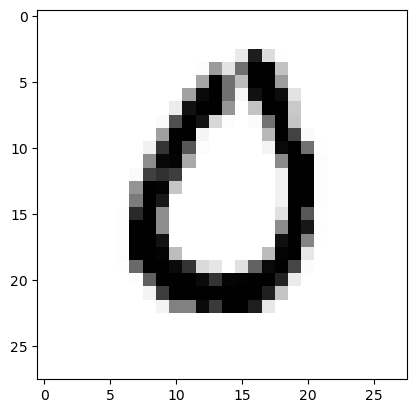

In [12]:
# 임의의 test 데이터로 예측한 값 시각화하기
r = np.random.randint(0,x_test.shape[0] - 1) # 0 to 9999 random int number
# r = 1411   # Label: 0, Prediction :  [9]

print('random = ',r, 'Label:',y_test[r])

print('Prediction : ',predict(x_test[r:r+1]).numpy())

image = tf.reshape(x_test[r],(28,28))
plt.imshow(image,cmap='Greys')
plt.show()

In [13]:
# 정확도 비교
# 1 layers              -------> Accuracy  : 0.8871
# 4 layers  sigmoid     -------> Accuracy  : 0.9017
# 4 layers  relu        -------> Accuracy  : 0.9564